Imports

In [7]:
from typing import Tuple
import math

import numpy as np
from numpy.random import randint, default_rng

from skimage.draw import polygon, circle_perimeter_aa, circle, circle_perimeter

import matplotlib.pyplot as plt
%matplotlib inline

import conf

# Common definitions

In [8]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams['figure.dpi'] = 96

rng = default_rng()

## Helper functions

In [9]:
def get_random_num_polygon_vertices():
  return randint(
    conf.MIN_NUM_POLYGON_VERTICES,
    conf.MAX_NUM_POLYGON_VERTICES
  )

def get_random_circumscribed_circle_size():
  return randint(
    conf.MIN_CIRCUMSCRIBED_CIRCLE_SIZE,
    conf.MAX_CIRCUMSCRIBED_CIRCLE_SIZE
  )

Define the necessary data structures

In [10]:
class ImagePolygon:
  """Contains the information to represent polygon on an image.
  Is used as gene of a chromosome.

  Attributes:
    points  Numpy array of points of an underlying polygon.
  """

  points: np.ndarray

  def __init__(self,
    circle_center_position: np.ndarray,
    circle_radius: int = get_random_circumscribed_circle_size(),
    num_points: int = get_random_num_polygon_vertices(),
  ):
    """ Initializes a polygon for the given parameters.
    All vertices of the polygon lie on the circumscribed circle.

    :param circle_center_position: A numpy array containing a pair of coordinates
      which correspond to the center of the circumscribed circle.
    :param circle_radius: Radius of the circumscribed circle.
    :param num_points: Number of polygon vertices.
    """
    points = []

    for _ in range(num_points):
      angle = rng.uniform(0, 2 * np.pi)
      base_x = circle_radius * math.sin(angle)
      base_y = circle_radius * math.cos(angle)
      x, y = circle_center_position + (base_x, base_y)
      points.append((x, y, angle))

    points.sort(key = lambda x: x[2])
    points = [(x[0], x[1]) for x in points]

    self.points = np.array(points)

  def __repr__(self):
    return self.points

  def __str__(self):
    return str(self.points)

class Chromosome:
  """Chromosome for the genetic algorithm. Can be represented as an image.

  Consists of the polygons that constitute the underlying image.
  """

  def __init__(self):
    pass

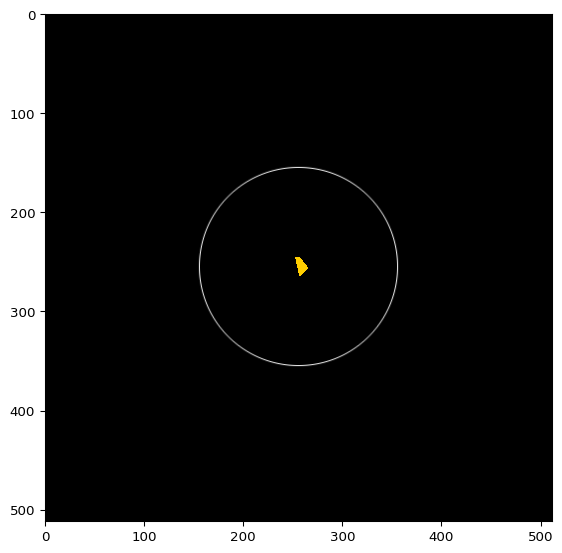

In [18]:
# Trash

p = ImagePolygon(np.array([255, 255]), 10)

img = np.zeros((512, 512, 3))

pX, pY = polygon(p.points[:,0], p.points[:,1])
eX, eY, aa = circle_perimeter_aa(255, 255, 100)

img[eX, eY] = np.outer(aa, [255, 255, 255])
img[pX, pY] = [255, 206, 0]

plt.imshow(img.clip(0, 255).astype('uint8'))

In [12]:
# img = np.zeros((512, 512, 3))
#
# a = np.array([
#   [264.86019496, 256.66629991],
#   [264.87614142, 256.56902221],
#   [247.8580518,  248.00053031],
# ])
#
# pX, pY = polygon(a[:,0], a[:,1])
#
# # cX, cY = circle_perimeter(264.86019496, 256.66629991, 5)
# cX, cY = circle_perimeter(264, 256, 5)
# img[cX, cY] = [255, 0, 0]
#
# # cX, cY = circle_perimeter(264.87614142, 256.56902221, 5)
# cX, cY = circle_perimeter(264, 256, 5)
# img[cX, cY] = [255, 0, 0]
#
# # cX, cY = circle_perimeter(247.8580518,  248.00053031, 5)
# cX, cY = circle_perimeter(247,  248, 5)
# img[cX, cY] = [255, 0, 0]
#
# print(pX)
# print(pY)
#
# plt.imshow(img.clip(0, 255).astype('uint8'))

# TODOs

- [ ] generate the **initial population**
- [ ] implement the **main loop** for the GA
- [ ] implement the **fitness function**
- [ ] implement the **mutation** method for a `Chromosome`
  - add new polygon
  - remove an existing polygon
  - change an existing polygon
    - reshape
    - change color
  - move an existing polygon
- [ ] implement the **crossover** method for a `Chromosome`
- [ ] implement the **selection** method for a population
